In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from time import strptime

In [3]:
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv('clean_df17.csv')
df.head()

,Unnamed: 0,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,...,date_created_y,date_moderated,date_edited,paid_info,region_name,description,boost,min_est,max_est,paid_infor
0,0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,...,"Thu, 07 Jul 2022 15:06:02 GMT","Tue, 02 Aug 2022 11:21:56 GMT","Tue, 02 Aug 2022 11:06:31 GMT",{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored
1,1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,...,"Wed, 20 Jul 2022 13:20:34 GMT","Tue, 02 Aug 2022 04:13:57 GMT","Fri, 29 Jul 2022 05:34:37 GMT",{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored
2,2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,...,"Thu, 23 Jun 2022 07:18:22 GMT","Mon, 11 Jul 2022 07:57:25 GMT","Mon, 11 Jul 2022 07:57:25 GMT",{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored
3,3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,...,"Mon, 25 Jul 2022 07:02:31 GMT","Mon, 25 Jul 2022 08:25:10 GMT",NaN,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored
4,4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,...,"Fri, 27 Aug 2021 18:31:50 GMT","Tue, 02 Aug 2022 10:55:11 GMT","Tue, 02 Aug 2022 10:55:11 GMT",{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored


In [65]:
df.min_est.quantile(0.9)

850.0

In [63]:
df.columns

Index(['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission', 'Mileage', 'price_valuation_txt', 'price_estimate',
       'selling_price', 'advert_id', 'id', 'name', 'date_created_x', 'phone',
       'page_url', 'adverts_count', 'status', 'date_created_y',
       'date_moderated', 'date_edited', 'paid_info', 'region_name',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor', 'day',
       'date', 'listing_duration'],
      dtype='object')

In [6]:
df = df.drop('Unnamed: 0', axis =1)

In [7]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,date_created_y,date_moderated,date_edited,paid_info,region_name,description,boost,min_est,max_est,paid_infor
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,"Thu, 07 Jul 2022 15:06:02 GMT","Tue, 02 Aug 2022 11:21:56 GMT","Tue, 02 Aug 2022 11:06:31 GMT",{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,"Wed, 20 Jul 2022 13:20:34 GMT","Tue, 02 Aug 2022 04:13:57 GMT","Fri, 29 Jul 2022 05:34:37 GMT",{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,"Thu, 23 Jun 2022 07:18:22 GMT","Mon, 11 Jul 2022 07:57:25 GMT","Mon, 11 Jul 2022 07:57:25 GMT",{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,"Mon, 25 Jul 2022 07:02:31 GMT","Mon, 25 Jul 2022 08:25:10 GMT",NaN,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,"Fri, 27 Aug 2021 18:31:50 GMT","Tue, 02 Aug 2022 10:55:11 GMT","Tue, 02 Aug 2022 10:55:11 GMT",{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored


In [8]:
df.Model.value_counts()

Land Cruiser Prado    923
Harrier               709
Note                  664
CX-5                  492
Hilux                 470
                     ... 
CLA-Class               1
Corolla II              1
404                     1
Splash                  1
Tribute                 1
Name: Model, Length: 400, dtype: int64

In [9]:
df.describe()

,Year of Manufacture,Mileage,selling_price,advert_id,id,phone,adverts_count,min_est
count,17689.000000,1.244900e+04,1.778000e+04,1.778000e+04,1.778000e+04,0.0,17780.000000,14622.000000
mean,2013.539940,9.008506e+04,2.289817e+06,8.834256e+06,1.892474e+06,NaN,627.770416,164.670300
std,3.000584,7.626886e+04,2.081253e+06,1.972373e+06,9.837891e+05,NaN,783.376166,327.524251
min,1958.000000,0.000000e+00,7.000000e+04,4.809480e+05,2.660000e+02,NaN,0.000000,1.000000
25%,2014.000000,6.000000e+04,1.100000e+06,7.927916e+06,1.305796e+06,NaN,74.000000,1.550000
50%,2014.000000,7.963700e+04,1.680000e+06,9.421684e+06,1.946001e+06,NaN,204.000000,2.380000
75%,2015.000000,1.018460e+05,2.650000e+06,1.036273e+07,2.314350e+06,NaN,1393.000000,5.810000
max,2022.000000,1.980000e+06,4.500000e+07,1.082561e+07,4.451866e+06,NaN,3123.000000,1000.000000


In [10]:
df.columns

Index(['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission', 'Mileage', 'price_valuation_txt', 'price_estimate',
       'selling_price', 'advert_id', 'id', 'name', 'date_created_x', 'phone',
       'page_url', 'adverts_count', 'status', 'date_created_y',
       'date_moderated', 'date_edited', 'paid_info', 'region_name',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor'],
      dtype='object')

In [11]:
df_cat = df[['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission','paid_info', 'region_name']]

<AxesSubplot:>

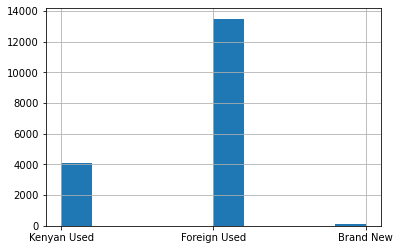

In [12]:
df.Condition.hist()

<AxesSubplot:>

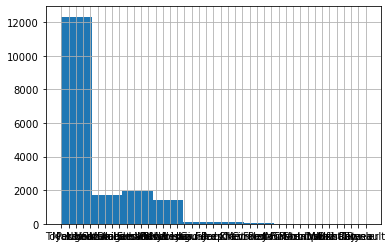

In [13]:
df.Make.hist()

In [14]:
df.selling_price.min()

70000.0

In [15]:
df.selling_price.max()

45000000.0

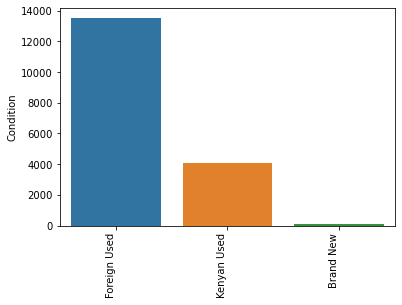

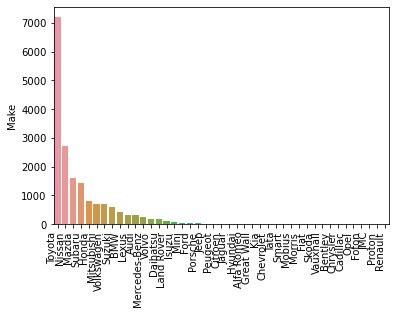

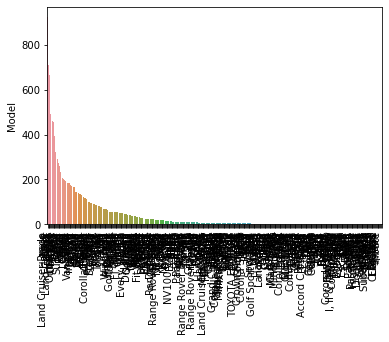

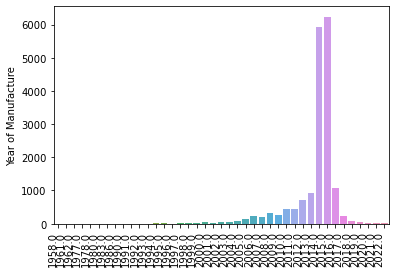

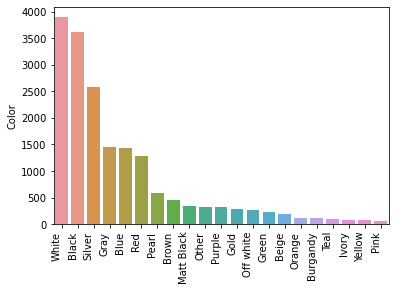

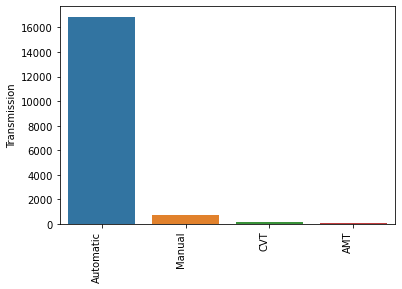

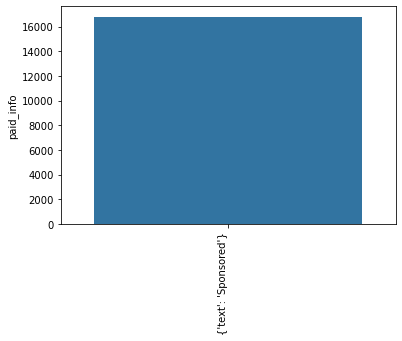

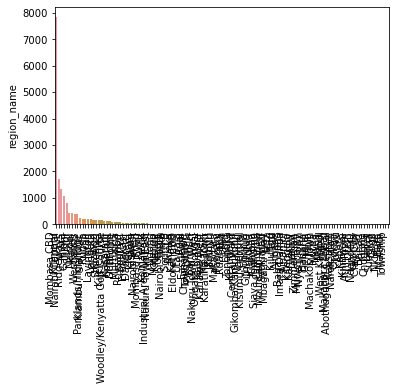

In [16]:
for column in df_cat.columns:  
    counts = df_cat[column].value_counts()
    chart = sns.barplot(x=counts.index ,y=counts)
    chart.set_xticklabels(chart.get_xticklabels(), 
                              rotation=90, 
                              horizontalalignment='right')
    plt.show()

In [17]:
df.columns

Index(['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission', 'Mileage', 'price_valuation_txt', 'price_estimate',
       'selling_price', 'advert_id', 'id', 'name', 'date_created_x', 'phone',
       'page_url', 'adverts_count', 'status', 'date_created_y',
       'date_moderated', 'date_edited', 'paid_info', 'region_name',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor'],
      dtype='object')

In [18]:
df.describe()

,Year of Manufacture,Mileage,selling_price,advert_id,id,phone,adverts_count,min_est
count,17689.000000,1.244900e+04,1.778000e+04,1.778000e+04,1.778000e+04,0.0,17780.000000,14622.000000
mean,2013.539940,9.008506e+04,2.289817e+06,8.834256e+06,1.892474e+06,NaN,627.770416,164.670300
std,3.000584,7.626886e+04,2.081253e+06,1.972373e+06,9.837891e+05,NaN,783.376166,327.524251
min,1958.000000,0.000000e+00,7.000000e+04,4.809480e+05,2.660000e+02,NaN,0.000000,1.000000
25%,2014.000000,6.000000e+04,1.100000e+06,7.927916e+06,1.305796e+06,NaN,74.000000,1.550000
50%,2014.000000,7.963700e+04,1.680000e+06,9.421684e+06,1.946001e+06,NaN,204.000000,2.380000
75%,2015.000000,1.018460e+05,2.650000e+06,1.036273e+07,2.314350e+06,NaN,1393.000000,5.810000
max,2022.000000,1.980000e+06,4.500000e+07,1.082561e+07,4.451866e+06,NaN,3123.000000,1000.000000


In [19]:
print(pd.pivot_table(df, index ='Make', values='selling_price').sort_values('selling_price', ascending=False))

               selling_price
Make                        
Foton           1.250000e+07
Vauxhall        7.500000e+06
Fiat            5.525000e+06
Smart           3.850000e+06
JMC             3.200000e+06
Mercedes-Benz   2.852346e+06
Jaguar          2.797778e+06
Alfa Romeo      2.749286e+06
Kia             2.614000e+06
Citroen         2.605000e+06
Isuzu           2.566148e+06
Daihatsu        2.504116e+06
Jeep            2.474211e+06
Volkswagen      2.473223e+06
Renault         2.470000e+06
Volvo           2.423088e+06
BMW             2.389778e+06
Audi            2.377380e+06
Land Rover      2.311910e+06
Toyota          2.301837e+06
Bentley         2.299999e+06
Subaru          2.292842e+06
Nissan          2.273145e+06
Mitsubishi      2.271317e+06
Honda           2.166607e+06
Mazda           2.166563e+06
Mini            2.165000e+06
Suzuki          2.159295e+06
Opel            2.150000e+06
Mobius          2.150000e+06
Ford            2.144835e+06
Lexus           2.029543e+06
Porsche       

In [20]:
df.value_counts('Model')

Model
Land Cruiser Prado    923
Harrier               709
Note                  664
CX-5                  492
Hilux                 470
                     ... 
Silvia                  1
Sienna                  1
CR-Z                    1
Shogun                  1
SL-Class                1
Length: 400, dtype: int64

In [21]:
df.isnull().sum()

Condition                109
Make                     109
Model                    109
Year of Manufacture      109
Color                     22
Transmission              19
Mileage                 5349
price_valuation_txt     3176
price_estimate          3176
selling_price             18
advert_id                 18
id                        18
name                      18
date_created_x            18
phone                  17798
page_url                  18
adverts_count             18
status                    18
date_created_y            18
date_moderated            18
date_edited             5863
paid_info               1002
region_name               18
description              108
boost                     18
min_est                 3176
max_est                 3176
paid_infor              1002
dtype: int64

In [22]:
df['price_valuation_txt'].value_counts()

The advert's price is above average!    5391
The advert's price is below market!     5061
The advert's price is in market!        4170
Name: price_valuation_txt, dtype: int64

In [23]:
type(df['date_moderated'].values[0])

str

In [24]:
time1=df['date_moderated'].values[9]



In [25]:
def get_time(date):
    try:
        time1 = date.split(',')[1]
        weekday = date.split(',')[0]
        time1 = time1.split(' ')[:-1]
        time1= time1[1:]
        time1
        day=time1[0]
        month = str(strptime(time1[1],'%b').tm_mon).zfill(2)
        year = time1[2]
        hour = time1[3].split(":")[0] 
        mins = time1[3].split(":")[1] 
        sec = time1[3].split(":")[2] 
        mod_date = str(year)+str(month)+str(day)+str(hour)+str(mins)+str(sec)
        mod_date = pd.to_datetime(mod_date)
        return [weekday, mod_date]
    except:
        return[date, date]
    


In [26]:
time1=df['date_moderated'].values[9]
get_time(time1)

['Tue', Timestamp('2022-08-02 11:34:25')]

In [27]:
date1 = time1[1].strip()
month1 = time1[2].strip()
year1 = time1[3].strip()
month1

'e'

In [28]:
time = strptime('Dec','%b').tm_mon
str(time).zfill(2)

'12'

In [29]:
tm=df['date_moderated'].values[:20].max()
tm =tm.split(' ')[4]
tm

'18:28:08'

In [30]:
tm_hour = tm.split(":")[0]
tm_min = tm.split(":")[1]
tm_sec = tm.split(":")[2]
tm_sec

'08'

In [31]:
df

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,date_created_y,date_moderated,date_edited,paid_info,region_name,description,boost,min_est,max_est,paid_infor
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,"Thu, 07 Jul 2022 15:06:02 GMT","Tue, 02 Aug 2022 11:21:56 GMT","Tue, 02 Aug 2022 11:06:31 GMT",{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,"Wed, 20 Jul 2022 13:20:34 GMT","Tue, 02 Aug 2022 04:13:57 GMT","Fri, 29 Jul 2022 05:34:37 GMT",{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,"Thu, 23 Jun 2022 07:18:22 GMT","Mon, 11 Jul 2022 07:57:25 GMT","Mon, 11 Jul 2022 07:57:25 GMT",{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,"Mon, 25 Jul 2022 07:02:31 GMT","Mon, 25 Jul 2022 08:25:10 GMT",NaN,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,"Fri, 27 Aug 2021 18:31:50 GMT","Tue, 02 Aug 2022 10:55:11 GMT","Tue, 02 Aug 2022 10:55:11 GMT",{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The advert's price is above average!,KSh 3.92 M - 4 M,4400000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.92,4,NaN
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The advert's price is below market!,KSh 2.31 M - 2.94 M,2200000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.31,2.94,NaN
17796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['day']= df['date_moderated'].apply(lambda x:get_time(x)[0])
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,date_moderated,date_edited,paid_info,region_name,description,boost,min_est,max_est,paid_infor,day
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,"Tue, 02 Aug 2022 11:21:56 GMT","Tue, 02 Aug 2022 11:06:31 GMT",{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored,Tue
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,"Tue, 02 Aug 2022 04:13:57 GMT","Fri, 29 Jul 2022 05:34:37 GMT",{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored,Tue
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,"Mon, 11 Jul 2022 07:57:25 GMT","Mon, 11 Jul 2022 07:57:25 GMT",{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored,Mon
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,"Mon, 25 Jul 2022 08:25:10 GMT",NaN,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,Mon
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,"Tue, 02 Aug 2022 10:55:11 GMT","Tue, 02 Aug 2022 10:55:11 GMT",{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,Tue


In [33]:
df['date']= df['date_moderated'].apply(lambda x:get_time(x)[1])
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,date_edited,paid_info,region_name,description,boost,min_est,max_est,paid_infor,day,date
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,"Tue, 02 Aug 2022 11:06:31 GMT",{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored,Tue,2022-08-02 11:21:56
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,"Fri, 29 Jul 2022 05:34:37 GMT",{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored,Tue,2022-08-02 04:13:57
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,"Mon, 11 Jul 2022 07:57:25 GMT",{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored,Mon,2022-07-11 07:57:25
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,NaN,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,Mon,2022-07-25 08:25:10
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,"Tue, 02 Aug 2022 10:55:11 GMT",{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,Tue,2022-08-02 10:55:11


In [35]:
td =np.datetime64(datetime.today().now())
def get_duration(t):
    try:
        x= np.datetime64(td)-np.datetime64(t)
        days = x.astype('timedelta64[D]')
        days = days/np.timedelta64(1, 'D')
        return days 
    except:
        return 0
    

In [36]:
dd = df['date'].values[199]
get_duration(dd)

28.0

In [37]:
df['listing_duration']= df['date'].apply(lambda x: get_duration(x) )
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,paid_info,region_name,description,boost,min_est,max_est,paid_infor,day,date,listing_duration
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored,Tue,2022-08-02 11:21:56,14.0
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored,Tue,2022-08-02 04:13:57,14.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored,Mon,2022-07-11 07:57:25,36.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,Mon,2022-07-25 08:25:10,22.0
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,Tue,2022-08-02 10:55:11,14.0


In [38]:
df.listing_duration.max()

507.0

<AxesSubplot:>

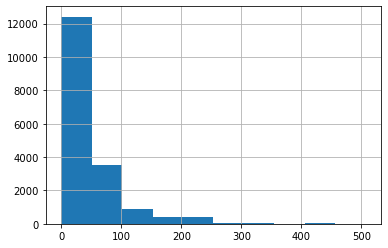

In [39]:
df.listing_duration.hist()

In [40]:
df.name.value_counts()

REDLINE MOTORS       1520
Norein Motors        1127
Pemire Motors        1034
shabal motors.       1033
ROB JAPAN MOTORS      619
                     ... 
Ken Isuzu Trucks        1
Jonathan Mahianyu       1
Calix Auto Motors       1
Kasaine Saibulu         1
David Mugambi           1
Name: name, Length: 962, dtype: int64

In [49]:
df.columns

Index(['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission', 'Mileage', 'price_valuation_txt', 'price_estimate',
       'selling_price', 'advert_id', 'id', 'name', 'date_created_x', 'phone',
       'page_url', 'adverts_count', 'status', 'date_created_y',
       'date_moderated', 'date_edited', 'paid_info', 'region_name',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor', 'day',
       'date', 'listing_duration'],
      dtype='object')

In [50]:
df.head()

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,price_valuation_txt,price_estimate,selling_price,...,paid_info,region_name,description,boost,min_est,max_est,paid_infor,day,date,listing_duration
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,The advert's price is below market!,KSh 1.4 M - 1.45 M,1270000.0,...,{'text': 'Sponsored'},Kilimani,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1.40,1.45,Sponsored,Tue,2022-08-02 11:21:56,14.0
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,The advert's price is above average!,KSh 2.5 M - 2.65 M,2750000.0,...,{'text': 'Sponsored'},Kilimani,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2.50,2.65,Sponsored,Tue,2022-08-02 04:13:57,14.0
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,The advert's price is in market!,KSh 1.08 M - 1.1 M,1090000.0,...,{'text': 'Sponsored'},Ridgeways,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1.08,1.1,Sponsored,Mon,2022-07-11 07:57:25,36.0
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,NaN,NaN,1720000.0,...,{'text': 'Sponsored'},Langata,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,Mon,2022-07-25 08:25:10,22.0
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,NaN,NaN,1999000.0,...,{'text': 'Sponsored'},Nairobi Central,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,Tue,2022-08-02 10:55:11,14.0


In [52]:
df.dtypes

Condition                      object
Make                           object
Model                          object
Year of Manufacture           float64
Color                          object
Transmission                   object
Mileage                       float64
price_valuation_txt            object
price_estimate                 object
selling_price                 float64
advert_id                     float64
id                            float64
name                           object
date_created_x                 object
phone                         float64
page_url                       object
adverts_count                 float64
status                         object
date_created_y                 object
date_moderated                 object
date_edited                    object
paid_info                      object
region_name                    object
description                    object
boost                          object
min_est                       float64
max_est     

In [51]:
df.describe()

,Year of Manufacture,Mileage,selling_price,advert_id,id,phone,adverts_count,min_est,listing_duration
count,17689.000000,1.244900e+04,1.778000e+04,1.778000e+04,1.778000e+04,0.0,17780.000000,14622.000000,17798.000000
mean,2013.539940,9.008506e+04,2.289817e+06,8.834256e+06,1.892474e+06,NaN,627.770416,164.670300,53.150972
std,3.000584,7.626886e+04,2.081253e+06,1.972373e+06,9.837891e+05,NaN,783.376166,327.524251,50.390343
min,1958.000000,0.000000e+00,7.000000e+04,4.809480e+05,2.660000e+02,NaN,0.000000,1.000000,0.000000
25%,2014.000000,6.000000e+04,1.100000e+06,7.927916e+06,1.305796e+06,NaN,74.000000,1.550000,25.000000
50%,2014.000000,7.963700e+04,1.680000e+06,9.421684e+06,1.946001e+06,NaN,204.000000,2.380000,38.000000
75%,2015.000000,1.018460e+05,2.650000e+06,1.036273e+07,2.314350e+06,NaN,1393.000000,5.810000,61.000000
max,2022.000000,1.980000e+06,4.500000e+07,1.082561e+07,4.451866e+06,NaN,3123.000000,1000.000000,507.000000


In [53]:
car_data = df[['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color','Transmission', 'Mileage', 'selling_price','day','boost', 'date', 'listing_duration', 'region_name', 'min_est','max_est' ]]

In [54]:
car_data

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1.40,1.45
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2.50,2.65
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1.08,1.1
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4400000.0,NaN,NaN,NaT,0.0,NaN,3.92,4
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700000.0,NaN,NaN,NaT,0.0,NaN,NaN,NaN
17795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200000.0,NaN,NaN,NaT,0.0,NaN,2.31,2.94
17796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850000.0,NaN,NaN,NaT,0.0,NaN,NaN,NaN


In [55]:
car_data.isnull().sum()

Condition               109
Make                    109
Model                   109
Year of Manufacture     109
Color                    22
Transmission             19
Mileage                5349
selling_price            18
day                      18
boost                    18
date                     18
listing_duration          0
region_name              18
min_est                3176
max_est                3176
dtype: int64

In [56]:
car_data.columns

Index(['Condition', 'Make', 'Model', 'Year of Manufacture', 'Color',
       'Transmission', 'Mileage', 'selling_price', 'day', 'boost', 'date',
       'listing_duration', 'region_name', 'min_est', 'max_est'],
      dtype='object')

In [57]:
car_data

,Condition,Make,Model,Year of Manufacture,Color,Transmission,Mileage,selling_price,day,boost,date,listing_duration,region_name,min_est,max_est
0,Kenyan Used,Toyota,Crown,2012.0,White,Automatic,NaN,1270000.0,Tue,40X Diamond,2022-08-02 11:21:56,14.0,Kilimani,1.40,1.45
1,Foreign Used,Mazda,CX-5,2016.0,White,Automatic,74000.0,2750000.0,Tue,VIP TOP+,2022-08-02 04:13:57,14.0,Kilimani,2.50,2.65
2,Foreign Used,Mazda,Demio,2015.0,Silver,Automatic,117000.0,1090000.0,Mon,VIP TOP+,2022-07-11 07:57:25,36.0,Ridgeways,1.08,1.1
3,Kenyan Used,Mazda,CX-5,2013.0,Black,AMT,92929.0,1720000.0,Mon,VIP TOP+,2022-07-25 08:25:10,22.0,Langata,NaN,NaN
4,Foreign Used,Peugeot,508,2014.0,Black,Automatic,91000.0,1999000.0,Tue,5X Diamond,2022-08-02 10:55:11,14.0,Nairobi Central,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4400000.0,NaN,NaN,NaT,0.0,NaN,3.92,4
17794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700000.0,NaN,NaN,NaT,0.0,NaN,NaN,NaN
17795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200000.0,NaN,NaN,NaT,0.0,NaN,2.31,2.94
17796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850000.0,NaN,NaN,NaT,0.0,NaN,NaN,NaN


In [58]:
car_data.to_csv('cardata1.csv')